## Title of our regression project

MLMaverick Team
- Seulah Lee 300361747
- David Steven Salazar Villegas 300356922
- Ishwinder Singh 300351938

## Importing Libraries (Collection of functions)
- **numpy** :  to perform a wide variety of mathematical operations on arrays
- **pandas** : to perform data manipulation that involves cleaning, transforming, and organizing data so that datset can be effectively analyzed
- **matplotlib.pyplot** : to view or present data in a pictorial or graphical format. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing unclean data csv


In [2]:
df = pd.read_csv('unclean_data.csv')

## Checking shape of dataframe

In [3]:
print("This dataset has {} data points with {} variables.".format(*df.shape))

This dataset has 4006 data points with 11 variables.


## Dropping all null value column and resetting indexes

In [4]:
df_cleaned = df.dropna(how='all').reset_index(drop=True)

In [5]:
print("This dataset has {} data points with {} variables.".format(*df_cleaned.shape))

This dataset has 3907 data points with 11 variables.


In [6]:
df_cleaned.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


## Using str function to replace and bring values to proper format
- Clean_Price function which replaces pound sign from price column values
- Clean_Space function removes the comma from the values to make it easier to convert to numeric value

In [7]:
def clean_price(price_str):
    # Replace currency symbols and commas with empty space
    cleaned_price = price_str.replace('£', ' ')
    return cleaned_price

def clean_space(price_str):
    cleaned_price = price_str.replace(',','')
    return cleaned_price

df_cleaned['price'] = df_cleaned['price'].apply(lambda x: clean_price(x))
df_cleaned['price'] = df_cleaned['price'].apply(lambda x: clean_space(x))

In [8]:
df_cleaned.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,30495,Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


## Cleaning name of columns and making them in proper format using inplace so to change it in the original dataframe and not copy

In [9]:
df_cleaned.rename(columns={'fuel type':'fuel_type', 'fuel type2':'fuel_type2',
                           'engine size':'engine_size','engine size2':'engine_size2'}, inplace=True)

In [10]:
df_cleaned.head()

,model,year,price,transmission,mileage,fuel_type,engine_size,mileage2,fuel_type2,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


## Merging values
- merging values of fuel_type into fuel_type2 and then removing the column fuel_type
- rename fuel_type2 into fuel_type.

In [11]:
# df.fuel_type2.fillna(df.fuel_type)
df_cleaned['fuel_type2'] = df_cleaned['fuel_type2'].fillna(df_cleaned['fuel_type'])

In [12]:
df_cleaned.head()

,model,year,price,transmission,mileage,fuel_type,engine_size,mileage2,fuel_type2,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,Diesel,2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,Petrol,1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,Diesel,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,Diesel,2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,Diesel,2,"4,500",Diesel,NaN,/ad/24913660


In [13]:
df_cleaned.drop(columns=['fuel_type'], inplace=True)
df_cleaned.rename(columns={'fuel_type2':'fuel_type'},inplace=True)

In [14]:
df_cleaned.head(10)

,model,year,price,transmission,mileage,engine_size,mileage2,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,2,"4,500",Diesel,NaN,/ad/24913660
5,C Class,2020.0,30999,Automatic,NaN,2,"1,000",Diesel,NaN,/ad/25059312
6,C Class,2020.0,35999,Automatic,NaN,2,500,Diesel,NaN,/ad/25418851
7,C Class,2019.0,37990,Automatic,NaN,3,"1,412",Petrol,NaN,/ad/25449314
8,C Class,2019.0,28990,Automatic,NaN,2,"3,569",Diesel,NaN,/ad/25046820
9,C Class,2019.0,28990,Automatic,NaN,2,"3,635",Diesel,NaN,/ad/25046821


## Merging values
- merging values of mileage2 into mileage and then removing the column mileage2 (so only mileage column exists)
- we also need to remove the comma separator from the value so we used str.replace to replace comma with an empty character.
- convert mileage into numeric using pd.to_numeric(df['mileage'],errors='coerce')

In [15]:
df_cleaned['mileage'] = df_cleaned['mileage'].fillna(df_cleaned['mileage2'])

In [16]:
df_cleaned['mileage'] = pd.to_numeric(df_cleaned['mileage'].str.replace(',', ''), errors='coerce')
df_cleaned.head()

,model,year,price,transmission,mileage,engine_size,mileage2,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200.0,2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000.0,1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,500.0,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000.0,2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500.0,2,"4,500",Diesel,NaN,/ad/24913660


## Here we drop the mileage2 column

In [17]:
df_cleaned.drop(columns=['mileage2'], inplace=True)

In [18]:
df_cleaned.head(20)

,model,year,price,transmission,mileage,engine_size,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200.0,2,Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000.0,1.5,Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,500.0,2,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000.0,2,Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500.0,2,Diesel,NaN,/ad/24913660
5,C Class,2020.0,30999,Automatic,1000.0,2,Diesel,NaN,/ad/25059312
6,C Class,2020.0,35999,Automatic,500.0,2,Diesel,NaN,/ad/25418851
7,C Class,2019.0,37990,Automatic,1412.0,3,Petrol,NaN,/ad/25449314
8,C Class,2019.0,28990,Automatic,3569.0,2,Diesel,NaN,/ad/25046820
9,C Class,2019.0,28990,Automatic,3635.0,2,Diesel,NaN,/ad/25046821


## Operations on engine_size column
- First we fill the empty engine_size2 values with engine_size values 
- Then we convert engine_size2 values to numeric for calculations
- We have 2 different type of engine sizes i.e., cc and litres. we need to make sure the format is same across the data so we compute all the engine_size2 values which are greater than 1000 we divide them by 1000 and then round off to make all the identical across the dataframe.
- atleast we drop the engine_size and then change engine_size2 to engine_size 

In [19]:
df_cleaned['engine_size2'] = df_cleaned['engine_size2'].fillna(df_cleaned['engine_size'])

In [20]:
df_cleaned['engine_size2'] = pd.to_numeric(df_cleaned['engine_size2'],errors='coerce')

In [21]:
df_cleaned['engine_size2']  = df_cleaned['engine_size2'].apply(lambda x: round(x/1000,1) if x>1000 else round(x,1))

In [22]:
df_cleaned.drop(columns=['engine_size'], inplace=True)

In [23]:
df_cleaned.head(10)

,model,year,price,transmission,mileage,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200.0,Diesel,2.0,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000.0,Petrol,1.5,/ad/25043746
2,C Class,2020.0,37899,Automatic,500.0,Diesel,2.0,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000.0,Diesel,2.0,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500.0,Diesel,2.0,/ad/24913660
5,C Class,2020.0,30999,Automatic,1000.0,Diesel,2.0,/ad/25059312
6,C Class,2020.0,35999,Automatic,500.0,Diesel,2.0,/ad/25418851
7,C Class,2019.0,37990,Automatic,1412.0,Petrol,3.0,/ad/25449314
8,C Class,2019.0,28990,Automatic,3569.0,Diesel,2.0,/ad/25046820
9,C Class,2019.0,28990,Automatic,3635.0,Diesel,2.0,/ad/25046821


In [24]:
df_cleaned.dropna(inplace=True)
df_cleaned.head(10)

,model,year,price,transmission,mileage,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200.0,Diesel,2.0,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000.0,Petrol,1.5,/ad/25043746
2,C Class,2020.0,37899,Automatic,500.0,Diesel,2.0,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000.0,Diesel,2.0,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500.0,Diesel,2.0,/ad/24913660
5,C Class,2020.0,30999,Automatic,1000.0,Diesel,2.0,/ad/25059312
6,C Class,2020.0,35999,Automatic,500.0,Diesel,2.0,/ad/25418851
7,C Class,2019.0,37990,Automatic,1412.0,Petrol,3.0,/ad/25449314
8,C Class,2019.0,28990,Automatic,3569.0,Diesel,2.0,/ad/25046820
9,C Class,2019.0,28990,Automatic,3635.0,Diesel,2.0,/ad/25046821


## Year value is given in float so we changes it to integer type

In [25]:
df_cleaned['year'].astype('int64')

0       2020
1       2020
2       2020
3       2019
4       2019
        ... 
3902    2017
3903    2018
3904    2014
3905    2014
3906    2014
Name: year, Length: 3898, dtype: int64

## Dropping the model and reference columns as given.

In [26]:
df_cleaned.drop(columns=['model','reference'],inplace=True)
df_cleaned.head()

,year,price,transmission,mileage,fuel_type,engine_size2
0,2020.0,30495,Automatic,1200.0,Diesel,2.0
1,2020.0,29989,Automatic,1000.0,Petrol,1.5
2,2020.0,37899,Automatic,500.0,Diesel,2.0
3,2019.0,30399,Automatic,5000.0,Diesel,2.0
4,2019.0,29899,Automatic,4500.0,Diesel,2.0


## Replacing categorical data

- In Transmission we have categorical data which is not useful for calculations so we used pd.get_dummies function to get all the different categories for transmission and then converting it to integer type to get values 1 and 0
- 1 represents that the current item has specific type of transmision present.
- we create a dummy datafram to get all the categories and their value and then join the dummy dataframe into our main dataframe.
- after this we remove the tranmission column which only contains the categorical values.
- Later we do the same process with fuel_type column and repeat all the steps.

In [27]:
df_transmit = pd.get_dummies(df_cleaned['transmission'])
df_transmit.rename(columns={'Other':'Other_Transmission'},inplace=True)
df_transmit.head()

,Automatic,Manual,Other_Transmission,Semi-Auto
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False


In [28]:
df_transmit['Automatic'] = df_transmit['Automatic'].astype(int)
df_transmit['Manual'] = df_transmit['Manual'].astype(int)
df_transmit['Other_Transmission'] = df_transmit['Other_Transmission'].astype(int)
df_transmit['Semi-Auto'] = df_transmit['Semi-Auto'].astype(int)

In [29]:
df_cleaned = df_cleaned.join(df_transmit)
df_cleaned.drop(columns='transmission',inplace=True)

In [30]:
df_cleaned.head()

,year,price,mileage,fuel_type,engine_size2,Automatic,Manual,Other_Transmission,Semi-Auto
0,2020.0,30495,1200.0,Diesel,2.0,1,0,0,0
1,2020.0,29989,1000.0,Petrol,1.5,1,0,0,0
2,2020.0,37899,500.0,Diesel,2.0,1,0,0,0
3,2019.0,30399,5000.0,Diesel,2.0,1,0,0,0
4,2019.0,29899,4500.0,Diesel,2.0,1,0,0,0


In [31]:
df_fuel = pd.get_dummies(df_cleaned['fuel_type'],dtype=int)
df_fuel.rename(columns={'Other':'Other_Fuel'},inplace=True)
df_fuel.head()

,Diesel,Hybrid,Other_Fuel,Petrol
0,1,0,0,0
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [32]:
df_cleaned = df_cleaned.join(df_fuel)

In [33]:
df_cleaned.drop(columns=['fuel_type'],inplace=True)
df_cleaned.head()

,year,price,mileage,engine_size2,Automatic,Manual,Other_Transmission,Semi-Auto,Diesel,Hybrid,Other_Fuel,Petrol
0,2020.0,30495,1200.0,2.0,1,0,0,0,1,0,0,0
1,2020.0,29989,1000.0,1.5,1,0,0,0,0,0,0,1
2,2020.0,37899,500.0,2.0,1,0,0,0,1,0,0,0
3,2019.0,30399,5000.0,2.0,1,0,0,0,1,0,0,0
4,2019.0,29899,4500.0,2.0,1,0,0,0,1,0,0,0


In [34]:
df_cleaned.rename(columns={'engine_size2':'engine_size'},inplace=True)
df_cleaned['year'] = df_cleaned['year'].astype('int64')
df_cleaned['price'] = pd.to_numeric(df_cleaned['price'])

## This is the final shape of the data after cleaning which is exactly the same as given in result csv file

In [35]:
print(df_cleaned.head())
print("This dataset has {} data points with {} variables.".format(*df_cleaned.shape))

   year  price  mileage  engine_size  Automatic  Manual  Other_Transmission  \
0  2020  30495   1200.0          2.0          1       0                   0   
1  2020  29989   1000.0          1.5          1       0                   0   
2  2020  37899    500.0          2.0          1       0                   0   
3  2019  30399   5000.0          2.0          1       0                   0   
4  2019  29899   4500.0          2.0          1       0                   0   

   Semi-Auto  Diesel  Hybrid  Other_Fuel  Petrol  
0          0       1       0           0       0  
1          0       0       0           0       1  
2          0       1       0           0       0  
3          0       1       0           0       0  
4          0       1       0           0       0  
This dataset has 3898 data points with 12 variables.


## Saving the cleaned data into csv

In [36]:
df_cleaned.to_csv('cleaned_data.csv')

## Data transformation
- Remove duplicates - does not need to pass a specific column as we want to remove rows that has same value for all columns 

In [37]:
#Identify duplicate rows
duplicates = df_cleaned[df_cleaned.duplicated(keep='first')] #same as keep=False
print(duplicates)

#Remove duplicates from cleaned data frame
#df_cleaned.duplicated()
df_cleaned = df_cleaned.drop_duplicates()
print(df_cleaned)

# 3898 (previous) - 102 (duplicates) = 3796 records left 
print("This dataset has {} data points with {} variables.".format(*df_cleaned.shape))

      year  price  mileage  engine_size  Automatic  Manual  \
73    2016  14000  45000.0          2.1          1       0   
74    2015  12000  40005.0          2.1          1       0   
84    2016  14000  45000.0          2.1          1       0   
85    2015  12000  40005.0          2.1          1       0   
86    2017  22767  30676.0          2.1          1       0   
...    ...    ...      ...          ...        ...     ...   
3860  2016  14000  45000.0          2.1          1       0   
3861  2015  12000  40005.0          2.1          1       0   
3887  2016  14000  45000.0          2.1          1       0   
3888  2015  12000  40005.0          2.1          1       0   
3889  2017  22767  30676.0          2.1          1       0   

      Other_Transmission  Semi-Auto  Diesel  Hybrid  Other_Fuel  Petrol  
73                     0          0       1       0           0       0  
74                     0          0       1       0           0       0  
84                     0         

In [38]:
df_cleaned.describe()

,year,price,mileage,engine_size,Automatic,Manual,Other_Transmission,Semi-Auto,Diesel,Hybrid,Other_Fuel,Petrol
count,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.00000,3796.000000,3796.000000,3796.000000
mean,2017.339568,23696.716544,22383.782666,2.037065,0.416491,0.051633,0.000263,0.531612,0.59431,0.039779,0.001581,0.364331
std,2.215129,8963.376509,22675.828174,0.492220,0.493042,0.221315,0.016231,0.499065,0.49109,0.195465,0.039731,0.481305
min,1991.000000,1290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2016.000000,17709.000000,6042.250000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2018.000000,22990.500000,14572.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000
75%,2019.000000,28880.000000,32124.250000,2.100000,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,1.000000
max,2020.000000,88995.000000,173000.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


## Let's remove the outliers
- Remove outliers: To detect outlier, we set the lower limit to three standard deviations below the mean (μ - 3*σ), and the upper limit to three standard deviations above the mean (μ + 3*σ).

In [39]:
# find out the indexes of outliers for target variable
mean = np.mean(df_cleaned["price"])
#print(mean)
std = np.std(df_cleaned["price"])
#print(sdev)

lower_limit = df_cleaned.loc[df_cleaned["price"] < (mean - 3*std) ].index
upper_limit = df_cleaned.loc[df_cleaned["price"] > (mean + 3*std) ].index
print("lower limit: ", lower_limit)
print("upper limit: ", upper_limit)
print("number of records: ", len(lower_limit) + len(upper_limit))

# drop them
df_cleaned.drop(lower_limit, inplace=True)
df_cleaned.drop(upper_limit, inplace=True)

# 3796 (previous) - 46 (outliers) = 3750 records left
print("This dataset has {} data points with {} variables.".format(*df_cleaned.shape))

lower limit:  Index([], dtype='int64')
upper limit:  Index([  80,   82,  186,  326,  565,  568,  655,  680,  712,  745,  817,  819,
        898, 1029, 1359, 1595, 1624, 1625, 1667, 1680, 1683, 1684, 1718, 1754,
       1833, 1915, 2039, 2156, 2174, 2182, 2232, 2387, 2395, 2454, 2457, 2508,
       2535, 2538, 2567, 2665, 2766, 3207, 3208, 3210, 3520, 3864],
      dtype='int64')
number of records:  46
This dataset has 3750 data points with 12 variables.


In [40]:
# find out the indexes of outliers for features variables
mean = np.mean(df_cleaned["year"])
#print(mean)
std = np.std(df_cleaned["year"])
#print(sdev)

lower_limit = df_cleaned.loc[df_cleaned["year"] < (mean - 3*std) ].index
upper_limit = df_cleaned.loc[df_cleaned["year"] > (mean + 3*std) ].index
print("lower limit: ", lower_limit)
print("upper limit: ", upper_limit)
print("number of records: ", len(lower_limit) + len(upper_limit))

# drop them
df_cleaned.drop(lower_limit, inplace=True)
df_cleaned.drop(upper_limit, inplace=True)

# 3750 (previous) - 50 (outliers) = 3700 records left
print("This dataset has {} data points with {} variables.".format(*df_cleaned.shape))

lower limit:  Index([  75,   79, 2991, 2994, 3012, 3017, 3093, 3331, 3332, 3333, 3337, 3379,
       3380, 3391, 3406, 3425, 3427, 3444, 3449, 3461, 3462, 3463, 3473, 3507,
       3516, 3523, 3524, 3538, 3540, 3563, 3565, 3566, 3582, 3596, 3597, 3598,
       3617, 3618, 3619, 3621, 3694, 3732, 3733, 3735, 3746, 3763, 3764, 3765,
       3766, 3865],
      dtype='int64')
upper limit:  Index([], dtype='int64')
number of records:  50
This dataset has 3700 data points with 12 variables.


In [41]:
# find out the indexes of outliers for features variables
mean = np.mean(df_cleaned["mileage"])
#print(mean)
std = np.std(df_cleaned["mileage"])
#print(sdev)

lower_limit = df_cleaned.loc[df_cleaned["mileage"] < (mean - 3*std) ].index
upper_limit = df_cleaned.loc[df_cleaned["mileage"] > (mean + 3*std) ].index
print("lower limit: ", lower_limit)
print("upper limit: ", upper_limit)
print("number of records: ", len(lower_limit) + len(upper_limit))

# drop them
df_cleaned.drop(lower_limit, inplace=True)
df_cleaned.drop(upper_limit, inplace=True)

# 3700 (previous) - 62 (outliers) = 3638 records left
print("This dataset has {} data points with {} variables.".format(*df_cleaned.shape))

lower limit:  Index([], dtype='int64')
upper limit:  Index([  11,   12,   27,   42,   54,   56,  137,  610,  650,  882,  950, 1244,
       2834, 2861, 2868, 2877, 2881, 2910, 3003, 3004, 3005, 3006, 3007, 3008,
       3009, 3010, 3011, 3016, 3028, 3184, 3185, 3193, 3244, 3270, 3271, 3273,
       3275, 3301, 3302, 3303, 3304, 3311, 3313, 3314, 3317, 3318, 3319, 3320,
       3368, 3385, 3405, 3420, 3421, 3445, 3446, 3453, 3457, 3469, 3479, 3480,
       3553, 3693],
      dtype='int64')
number of records:  62
This dataset has 3638 data points with 12 variables.


## EDA
**Feature Observation** 

Intuitively, for each feature we could predict the following:

 - Older cars (lower 'year' value) will be worth less. Usually old cars have a lower resale value
    
 - Cars with higher mileage will be worth less. Mileage is used as an indicative on how much use a car has over the years
    
Lets plot some data:

Text(0.5, 1.0, 'Price vs year model')

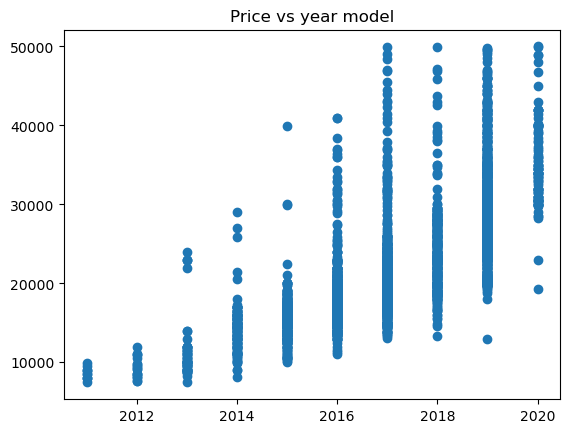

In [42]:
#Relationship between the year and price
plt.scatter(df_cleaned.year, df_cleaned.price)
plt.title("Price vs year model")

In [43]:
#there is some correlation but not that high

Text(0.5, 1.0, 'Price vs mileage')

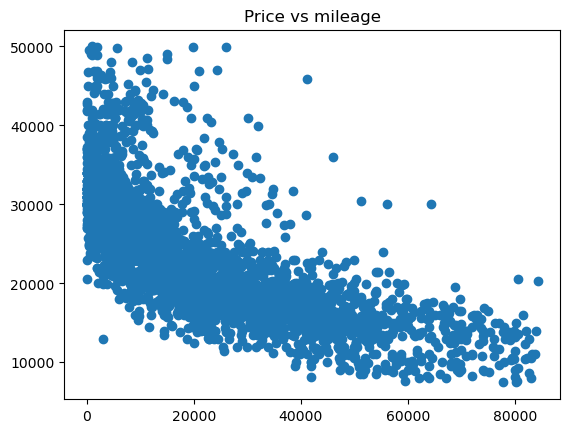

In [44]:
#Is there any relationship between mileage and price?

plt.scatter(df_cleaned.mileage, df_cleaned.price)
plt.title("Price vs mileage")

## Correlation
- year and mileage to be checked only as they are numerical independent variables
- year to price has positive relationship as correlation indicates ".729788"
- mileage to price has negative relationship as correlation indicates "-.720936"

In [45]:
df_cleaned.corr()

,year,price,mileage,engine_size,Automatic,Manual,Other_Transmission,Semi-Auto,Diesel,Hybrid,Other_Fuel,Petrol
year,1.000000,0.729788,-0.787858,-0.219802,-0.155263,-0.186528,-0.052564,0.234409,-0.172198,-0.134772,-0.015922,0.231127
price,0.729788,1.000000,-0.720936,0.261138,-0.067769,-0.258125,-0.025882,0.177761,-0.231042,-0.122002,-0.020446,0.286453
mileage,-0.787858,-0.720936,1.000000,0.152730,0.137994,0.195992,0.022294,-0.220405,0.194346,0.208869,0.062895,-0.287403
engine_size,-0.219802,0.261138,0.152730,1.000000,0.064730,-0.045938,0.037028,-0.045483,0.025714,0.010128,-0.000821,-0.030236
Automatic,-0.155263,-0.067769,0.137994,0.064730,1.000000,-0.183748,-0.013677,-0.907407,0.019568,0.085339,0.049275,-0.058343
Manual,-0.186528,-0.258125,0.195992,-0.045938,-0.183748,1.000000,-0.003694,-0.245064,0.020597,-0.044566,-0.009054,-0.002396
Other_Transmission,-0.052564,-0.025882,0.022294,0.037028,-0.013677,-0.003694,1.000000,-0.018241,0.013537,-0.003317,-0.000674,-0.012431
Semi-Auto,0.234409,0.177761,-0.220405,-0.045483,-0.907407,-0.245064,-0.018241,1.000000,-0.028532,-0.065049,-0.044713,0.058974
Diesel,-0.172198,-0.231042,0.194346,0.025714,0.019568,0.020597,0.013537,-0.028532,1.000000,-0.245047,-0.049785,-0.918291
Hybrid,-0.134772,-0.122002,0.208869,0.010128,0.085339,-0.044566,-0.003317,-0.065049,-0.245047,1.000000,-0.008131,-0.149982


## Split the dataset into training and test sets
Spliting 90:10 and using randomstate=42 to m
ake a repeatable result. 

In [46]:
# first let divide the df into features and response
response = df_cleaned["price"]
features = df_cleaned.drop('price', axis=1)

In [47]:
# Import 'train_test_split'
# !pip install sklearn # install sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features, 
                                                   response,
                                                   test_size=0.1,
                                                   random_state = 42)

print("Training and testing split was successful.")

Training and testing split was successful.


## Training and Testing

In [48]:
# build the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [49]:
# get the predictions for the test dataset
predictions = model.predict(X_test)

## Calculate the performance metric
- need to justify after review with ishu

In [50]:
# R-squared
print("R^2 in Training set:", model.score(X_train, Y_train))
print("R^2 in Test set:", model.score(X_test, Y_test))

R^2 in Training set: 0.7806378775897569
R^2 in Test set: 0.7808373921387115


In [51]:
# RMSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, predictions)

print('RMSE in Test set:', mse**0.5)

RMSE in Test set: 3617.778684904996


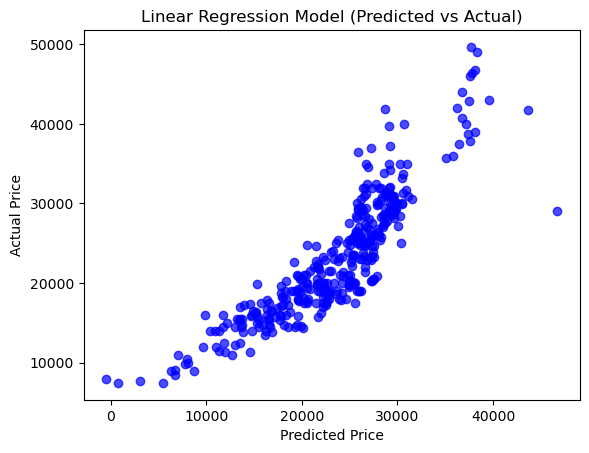

In [52]:
# plot the prediction vs actual
actual_values = Y_test
plt.scatter(predictions, actual_values, alpha=0.7, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title("Linear Regression Model (Predicted vs Actual)")
plt.show()

In [53]:
# the coefficient list
# model.coef_
feat = list(X_train.columns)
coef = model.coef_.transpose()
coef_table = np.vstack((feat, coef)).T
df = pd.DataFrame(coef_table, columns = ['Feature', 'Coefficients'])
print(df)

               Feature         Coefficients
0                 year   2311.5174387964676
1              mileage  -0.1381879325391188
2          engine_size    7223.959960441591
3            Automatic    1367.380365330875
4               Manual  -1231.9397534685133
5   Other_Transmission  -1177.7600799708134
6            Semi-Auto   1042.3194681084524
7               Diesel    -1039.59698322913
8               Hybrid     -84.149654441042
9           Other_Fuel    886.9525206107754
10              Petrol   236.79411705939188


## 7. Lasso Model

In [54]:
#importing libraries
from sklearn.linear_model import Lasso

In [63]:
#dropping categorical data for lasso model
features_ll = features.drop(['Automatic','Manual','Other_Transmission','Semi-Auto','Diesel','Hybrid','Other_Fuel','Petrol'],axis=1)

In [64]:
#selecting random alphas
alphas = np.linspace(1000,0.01,100)

In [65]:
#Split Training and Test set for lasso
xtrain_ll,xtest_ll,ytrain_ll,ytest_ll  = train_test_split(features_ll,response,test_size=0.1,random_state=42)

In [67]:
rmse_test_list_ll =[]
r2_test_list_ll =[]
r2_train_list_ll=[]


best_alpha_ll= 1
best_r2_test_ll=0

for a in alphas:
    lasso = Lasso(alpha =a , max_iter=1000)
    lasso.fit(xtrain_ll,ytrain_ll)
    pred_ll = lasso.predict(xtest_ll)
    
    
    r2_train_list_ll.append(lasso.score(xtrain_ll,ytrain_ll))
    
    
    r2_test_ll = lasso.score(xtest_ll,ytest_ll)
    r2_test_list_ll.append(r2_test_ll)
    if r2_test_ll > best_r2_test_ll:
        best_r2_test_ll = r2_test_ll
        best_alpha_ll = a
    rmse_ll = mean_squared_error(ytest_ll, pred_ll) ** 0.5
    rmse_test_list_ll.append(rmse_ll)
    print('RMSE Lasso : ', rmse_ll, 'for alpha',a)
print("best alpha for Lasso",best_alpha_ll)
print("best_R2 for Lasso",best_r2_test_ll)
lasso_result = np.vstack((alphas, r2_train_list_ll,r2_test_list_ll,rmse_test_list_ll)).T
lasso_df = pd.DataFrame(lasso_result,columns=['Alpha','R2(train)','R2(test)','RMSE'])

RMSE Lasso :  4516.2117676268535 for alpha 1000.0
RMSE Lasso :  4501.258758612917 for alpha 989.8990909090909
RMSE Lasso :  4486.4184807698875 for alpha 979.7981818181818
RMSE Lasso :  4471.692056466055 for alpha 969.6972727272728
RMSE Lasso :  4457.080614235498 for alpha 959.5963636363637
RMSE Lasso :  4442.58528858929 for alpha 949.4954545454545
RMSE Lasso :  4428.207219818407 for alpha 939.3945454545454
RMSE Lasso :  4413.9475537863555 for alpha 929.2936363636363
RMSE Lasso :  4399.7735895300175 for alpha 919.1927272727273
RMSE Lasso :  4385.754674762358 for alpha 909.0918181818182
RMSE Lasso :  4371.857632072037 for alpha 898.9909090909091
RMSE Lasso :  4358.0836273348505 for alpha 888.89
RMSE Lasso :  4344.433830824526 for alpha 878.7890909090909
RMSE Lasso :  4330.909416948565 for alpha 868.6881818181819
RMSE Lasso :  4317.511563973628 for alpha 858.5872727272726
RMSE Lasso :  4304.2414537418235 for alpha 848.4863636363636
RMSE Lasso :  4291.100271376254 for alpha 838.38545454545

In [69]:
lasso = Lasso(alpha= best_alpha_ll)
lasso.fit(xtrain_ll,ytrain_ll)
pred_ll= lasso.predict(xtest_ll)
r2_train_ll = lasso.score(xtrain_ll,ytrain_ll)
r2_test_ll = lasso.score(xtest_ll,ytest_ll)
rmse_ll = mean_squared_error(ytest_ll,pred_ll) ** 0.5
print("R^2  train for Lasso with best alpha : ",r2_train_ll)
print("R^2 test for Lasso with best alpha: ",r2_test_ll)
print("RMSE for Lasso",rmse_ll)
print(pd.Series(lasso.coef_,index=features_ll.columns))


R^2  train for Lasso with best alpha :  0.7688410938207955
R^2 test for Lasso with best alpha:  0.7639542716505376
RMSE for Lasso 3754.540891352899
year           2275.112915
mileage          -0.151716
engine_size    7006.219194
dtype: float64


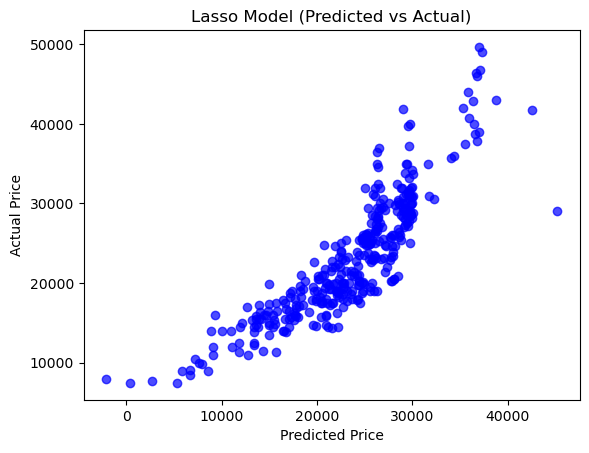

In [70]:
actual_values_ll = ytest_ll
plt.scatter(pred_ll, actual_values_ll, alpha=0.7, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title("Lasso Model (Predicted vs Actual)")
plt.show()

## 8. A Simple Polynomial Regression Model 

In [56]:
#import library
from sklearn.preprocessing import PolynomialFeatures

In [57]:
#split train and test dataset
X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(features, 
                                                   response,
                                                   test_size=0.1,
                                                   random_state = 42)

print("Training and testing split was successful.")

Training and testing split was successful.


In [58]:
#Create polynomial features
poly = PolynomialFeatures(degree =2)
X_train_poly = poly.fit_transform(X_train_poly)
X_test_poly = poly.transform(X_test_poly)

In [59]:
# Fit a linear regression model to the polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly, Y_train_poly)
pred_poly = model_poly.predict(X_test_poly)

In [60]:
#R-squared
r2_train_poly = model_poly.score(X_train_poly, Y_train_poly)
print("R^2 in Trainset:", r2_train_poly)
r2_test_poly = model_poly.score(X_test_poly, Y_test_poly)
print("R^2 in Testset:", r2_test_poly)

R^2 in Trainset: 0.853048636642302
R^2 in Testset: 0.8503812710310764


In [61]:
# rmse
rmse_poly = mean_squared_error(Y_test_poly, pred_poly)**0.5 
print("RMSE in Test:", rmse_poly)

RMSE in Test: 2989.1777878303787


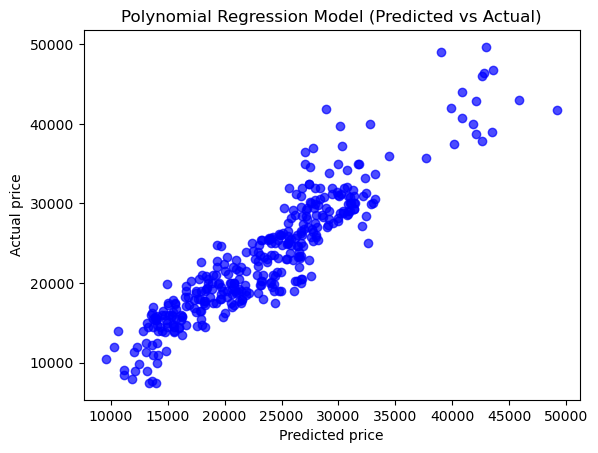

In [62]:
# Plot the original data
plt.scatter(pred_poly, Y_test_poly, alpha=0.7, color='b')

# Add labels and legend
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title("Polynomial Regression Model (Predicted vs Actual)")
plt.show()